## Abstract

### Resumen
- En el dataset se encuentra información sobre 2392 estudiantes de secundaria
#### Descripción de columnas
- StudentID: Identificador único de estudiantes
#### Detalles demograficos
- Age: La edad de los estudiantes entre los rangos de 15 a 18 años.
- Gender: Genero de los estudiantes, donde 0 representa masculino y 1 representa femenino.
- Ethnicity: La etnia de los estudiantes, codificados como:
    - 0: Caucasico
    - 1: Afroamericano
    - 2: Asiatico
    - 3: Otro
- ParentalEducation: Nivel Educacional de los padres, codificados como:
    - 0: Ninguno
    - 1: High School
    - 2: Some College
    - 3: Bachelor's
    - 4: Higher
#### Hábitos de Estudio
- StudyTimeWeekly: Estudio semanal de tiempo en horas, entre 0 a 20.
- Absences: Numero de ausencias durante el año escolar, rango de 0 a 30.
- Tutoring: Estado de tutorias, donde 0 indica no y 1 si.
- Participación de los padres
- ParentalSupport: Nivel de apoyo de los padres, codificado como:
    - 0: Ninguno
    - 1: Bajo
    - 2: Moderado
    - 3: Alto
    - 4: Muy alto
#### Actividades extracurriculares
- Extracurricular: Participación en actividades extracurriculares, donde 0 indica no y 1 indica si.
- Sports: Participacion en deportes, donde 0 indica no y 1 indica si.
- Music: Participacion en actividades musicales, donde 0 indica no y 1 indica si.
- Volunteering: Participacion en voluntariado, donde 0 indica no y 1 indica si.
#### Rendimiento academico
- GPA: Promedio de calificaciones en una escala de 2.0 a 4.0 , influenciado por los habitos de estudio, participacion de los padres y actividades extracurriculares.
- GradeClass: Calificación de los estudiantes basados en su calificaciones de la columna GPA:
    - 0: 'A' (GPA >= 3.5)
    - 1: 'B' (3.0 <= GPA < 3.5)
    - 2: 'C' (2.5 <= GPA < 3.0)
    - 3: 'D' (2.0 <= GPA < 2.5)
    - 4: 'F' (GPA < 2.0)

### Hipótesis

Mediante el estudio de los distintos datos entregados por el dataset, se espera definir puntos claves para el exito academico de los estudiantes y asi ver que caracteristicas tienen mas influencia en las calificaciones obtenidas por ellos.
    
### Objetivos

Se busca obtener conclusiones respecto a la hipótesis planteada gracias al analisis de los datos obtenidos mediante la información extraida a traves de graficos, ademas de identificar que variables afectan a la obtencion de las calificaciones de los estudiantes.


In [327]:
# Importar librerías necesarias
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np
import plotly.express as px

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

np.random.seed(42)

In [328]:
# Importamos el dataset
df = pd.read_csv('student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93,2.00
1,1002,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04,1.00
2,1003,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11,4.00
3,1004,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05,3.00
4,1005,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.68,2,0,4,1,0,0,0,3.46,0.00
2388,3389,17,0,0,1,7.58,4,1,4,0,1,0,0,3.28,4.00
2389,3390,16,1,0,2,6.81,20,0,2,0,0,0,1,1.14,2.00
2390,3391,16,1,1,0,12.42,17,0,2,0,1,1,0,1.80,1.00


In [329]:
#Se observa la informacion del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00
mean,2196.50,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.20,0.16,1.91,2.98
std,690.66,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.40,0.36,0.92,1.23
min,1001.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1598.75,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.00,0.00,1.17,2.00
50%,2196.50,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.00,0.00,1.89,4.00
75%,2794.25,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.00,0.00,2.62,4.00
max,3392.00,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.00,1.00,4.00,4.00


In [330]:
#Se verifican duplicados    
df.duplicated().sum()

0

Se logra observar que no se encuentran duplicados

In [331]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Tambien se verifica que no contiene valores nulos

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

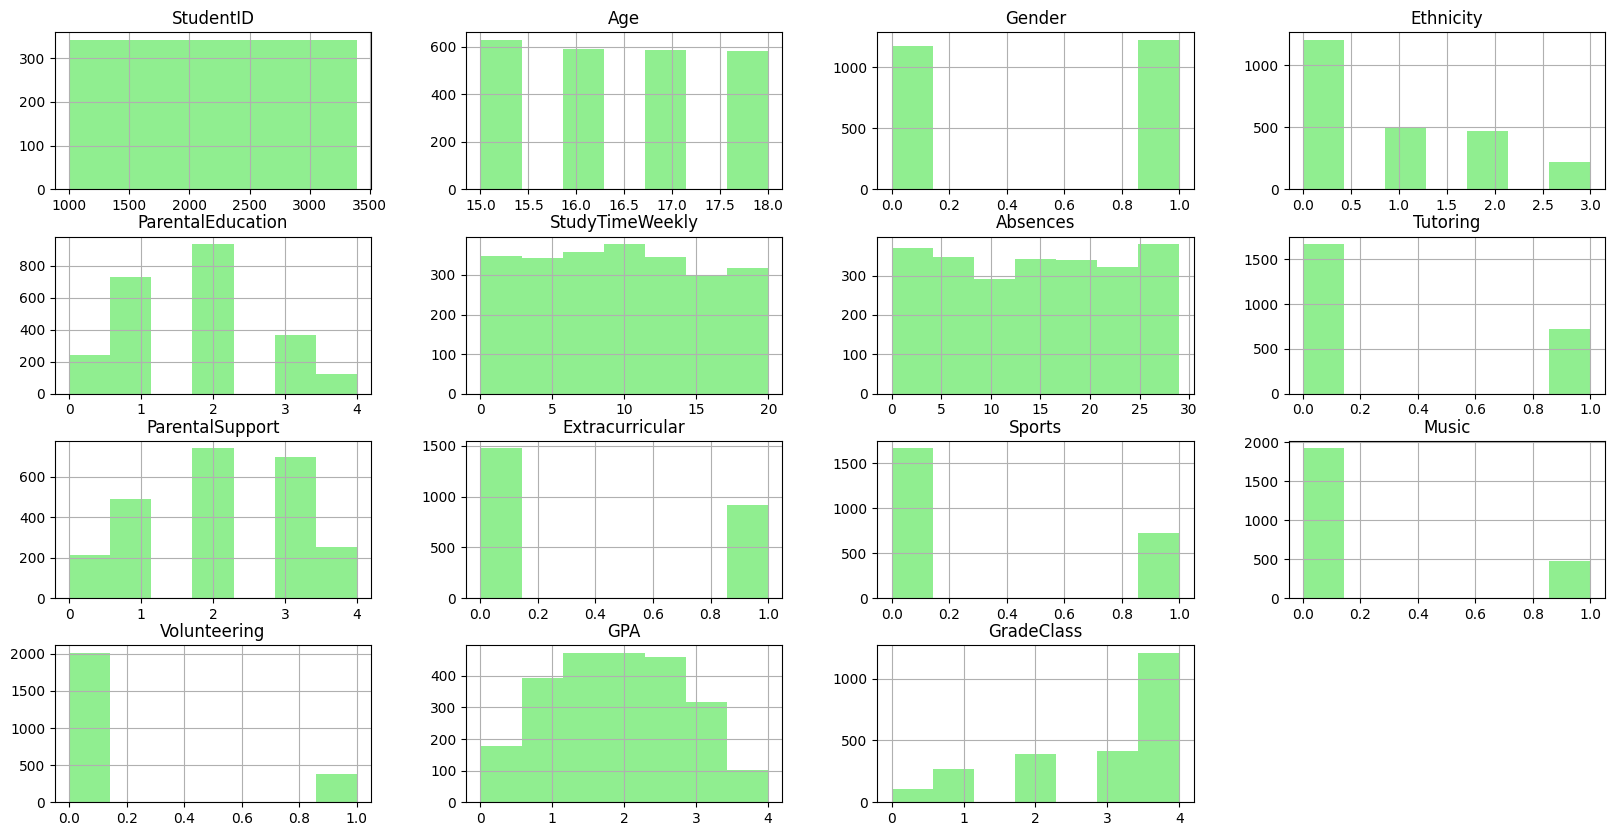

In [332]:
df.hist(figsize=(20,10),bins=7, color='lightgreen')

Respecto a los histogramas observados se pueden determinar algunas cosas. 
    -Se determina que el ID de los estudiantes no tiene una distribución asi que no afecta en las calificaciones.
    -Tambien se observa que solo hay 4 edades distintas en el dataset
    -La mayoria de estudiantes se encuentran con una baja calificación.

In [333]:
#Se definen tipos de caracteristicas de las columnas entre numericas y categoricas
columns = list(df.columns)

columnas_categoricas = []
columnas_numericas = []

for i in columns:
    if len(df[i].unique()) > 5:
        columnas_numericas.append(i)
    else:
        columnas_categoricas.append(i)
        
# Se asume que la primera columna es un ID
columnas_numericas = columnas_numericas[1:]

print('Caracteristicas numericas: ', columnas_numericas)
print('Caracteristicas categoricas: ', columnas_categoricas)

Caracteristicas numericas:  ['StudyTimeWeekly', 'Absences', 'GPA']
Caracteristicas categoricas:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


Se determino que columnas pertenecen a variables categoricas y numericas, si los valores unicos de la categoria son menores a 5 estos se clasifican como categoricas y por el contrario son mayores se clasifican como numericas.

In [334]:
# Convertimos las columnas numericas a flotantes
df[columnas_numericas] = df[columnas_numericas].astype('float64')

In [335]:
# Se inicia  LabelEncoder
label_encoder = LabelEncoder()

# Encode caracteristicas categoricas
df = df.copy()
for column in df[columnas_categoricas]:  
    df[column] = label_encoder.fit_transform(df[column])

# Se estandarizan las caracteristicas numericas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

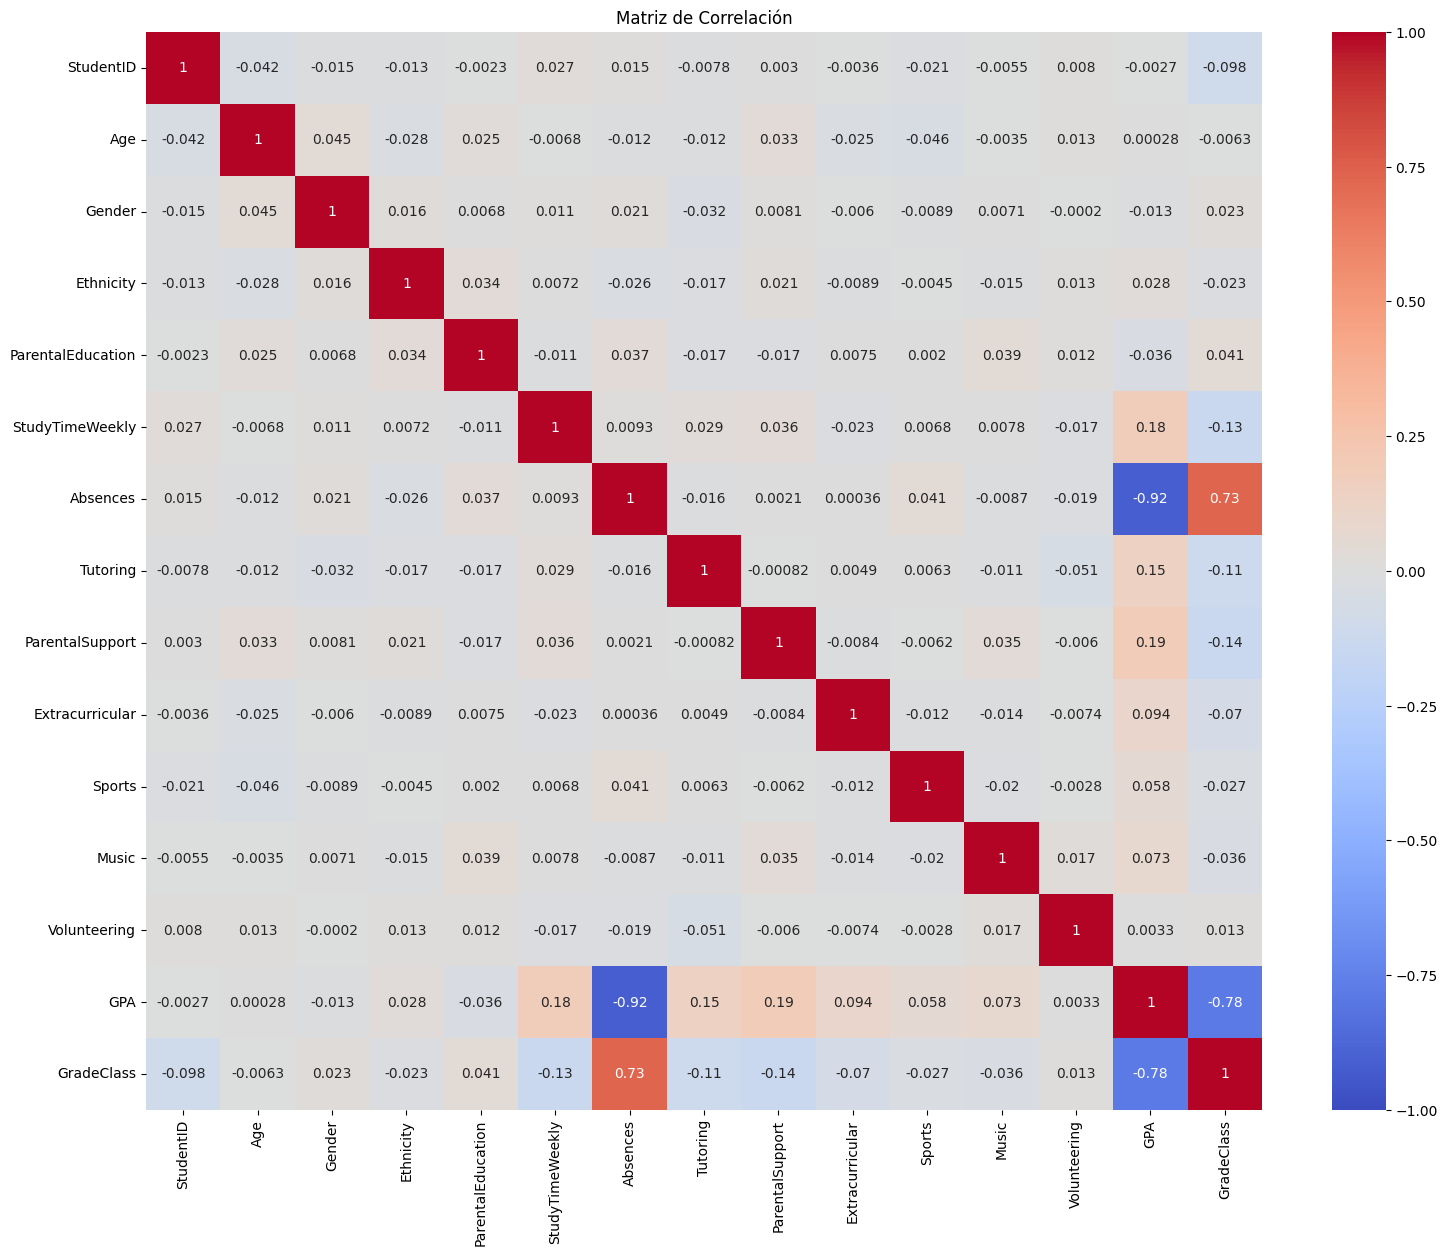

In [336]:
#mapa de calor de la correlacion de columnas
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Se observan las correlaciones de las caracteristicas del dataset, de lo cual se infiere que las ausencias son determinantes para obtener buenas calificaciones.

In [337]:
# Elegimos nuestra variable objetivo 'GradeClass'
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID','Age'])
y = df['GradeClass']

# separamos la informacion entre el entrenamiento y testeo (80% entrenamiento, 20% testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Se eliminan algunas columnas, como el id de estudiante que no podria ser usado para predecir, la clasificacion de clase debido a que sera la variable objetivo, gpa debido al ruido que puede generar al ser una variable similar a la variable objetivo y la edad porque se piensa que no es determinante al momento de obtener alguna calificacion.

In [338]:
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

cimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

Se busca determinar la caracteristica mas significativa para la variable objetivo del dataset.

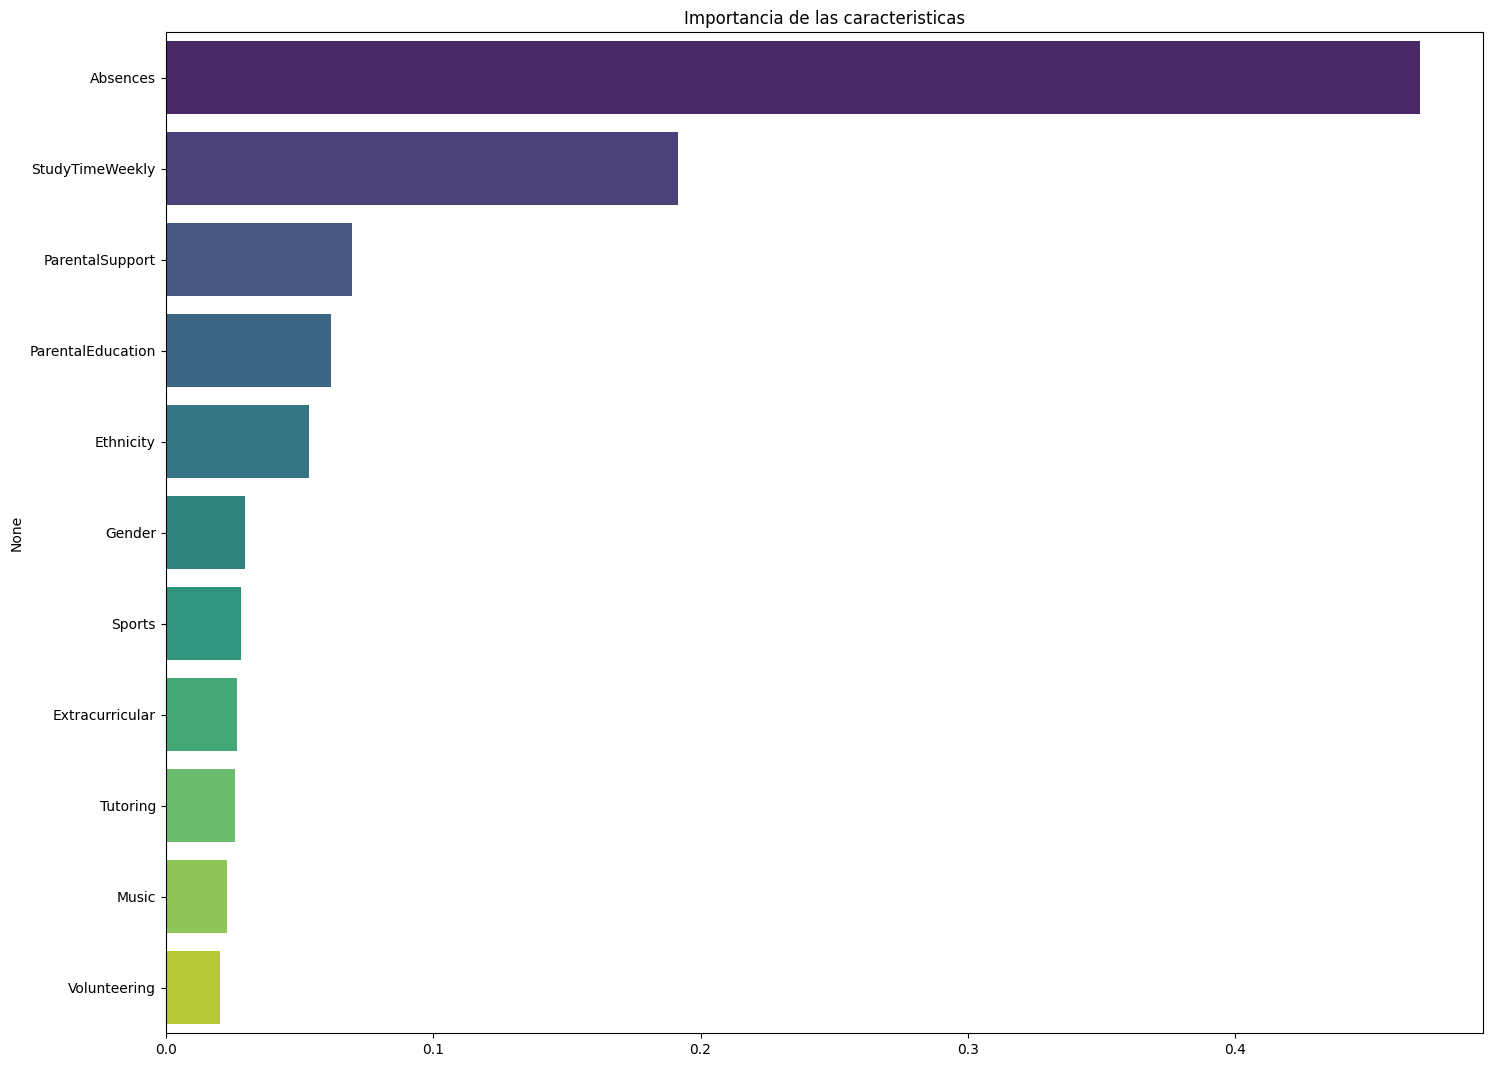

In [339]:
plt.figure(figsize=(17,13))
plt.title("Importancia de las caracteristicas")
ax = sns.barplot(y=cimp.index, x=cimp.values, orient='h',palette='viridis')


Se vuelve a mostrar las inasistencias como la variable mas importante para determinar las calificaciones.

In [340]:
# Diccionario para los modelos de clasificacion
modelos_clasificacion = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

nombre_modelos = []
precision = []

# Se entrena y evalua cada modelo
for name, clf in modelos_clasificacion.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    nombre_modelos.append(name)
    precision.append(score)
    print(f"{name} precision: {score:.2f}")

# Se crea un dataframe con los modelos y sus precisiones
df_models = pd.DataFrame({'Modelo': nombre_modelos, 'Precision': precision})

# Un grafico de los modelos
fig = px.bar(df_models, x='Modelo', y='Precision', title='Precision de los modelos')
fig.show()

Logistic Regression precision: 0.73
K-Nearest Neighbors precision: 0.65
Support Vector Machine precision: 0.75
Decision Tree precision: 0.57
Random Forest precision: 0.70
XGBoost precision: 0.67


In [341]:
# Se busca el mejor modelo para el caso
best_index = precision.index(max(precision))
nombre_mejor_modelo = nombre_modelos[best_index]
mejor_modelo = modelos_clasificacion[nombre_mejor_modelo]

print(f"El mejor modelo es: {nombre_mejor_modelo} con una precisión de {precision[best_index]:.2f}")

El mejor modelo es: Support Vector Machine con una precisión de 0.75


Despues de seleccionar el modelo, se procede a evaluarlo

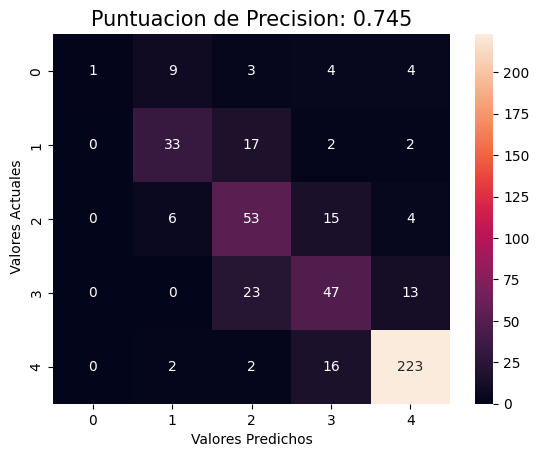

In [342]:
# Se inicializa y se entrena el modelo seleccionado
mejor_modelo.fit(X_train, y_train)
model_score = mejor_modelo.score(X_test, y_test)
y_pred = mejor_modelo.predict(X_test)

# Se calcula y grafica una matriz de confusion
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Valores Predichos')
plt.ylabel(' Valores Actuales')
plt.title('Puntuacion de Precision: {0}'.format(score), size=15)
plt.show()

Se busca realizar una optimizacion de hiperparametros mediante un randomized search.

In [343]:
# Se define el modelo
model = SVC()

# Define la evaluacion 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define el grid
grid = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
       }

# Define la busqueda
search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Se ajusta la busqueda hacia la informacionde entrenamiento
result = search.fit(X_train, y_train)

# Resumen de los resultados
print('Mejor Puntuacion: %s' % result.best_score_)
print('Mejores Hiperparametros: %s' % result.best_params_)

Mejor Puntuacion: 0.751517961023851
Mejores Hiperparametros: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


Se vuelve a evaluar el modelo

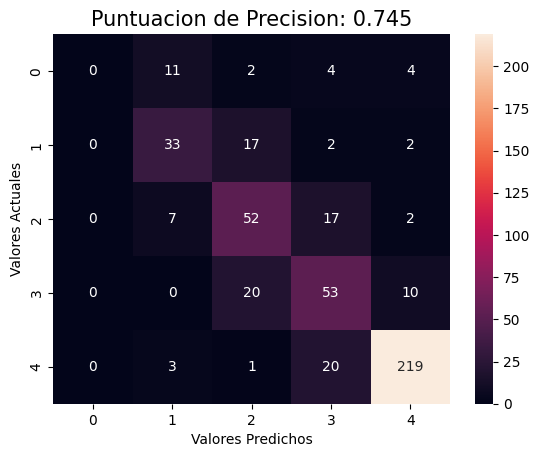

In [344]:
# ISe inicia y se entrena el modelo
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculo y grafica de la matriz de confusion
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Actuales')
plt.title('Puntuacion de Precision: {0}'.format(score), size=15)
plt.show()

Ahora se intentara reducir la dimensionalidad,utilizando las caractericticas mas significativas para las calificaciones

In [348]:
cimp.head(3)

Absences          0.47
StudyTimeWeekly   0.19
ParentalSupport   0.07
dtype: float64

In [349]:
X_train = X_train[['Absences', 'StudyTimeWeekly', 'ParentalSupport',]]
X_test = X_test[['Absences', 'StudyTimeWeekly', 'ParentalSupport',]]

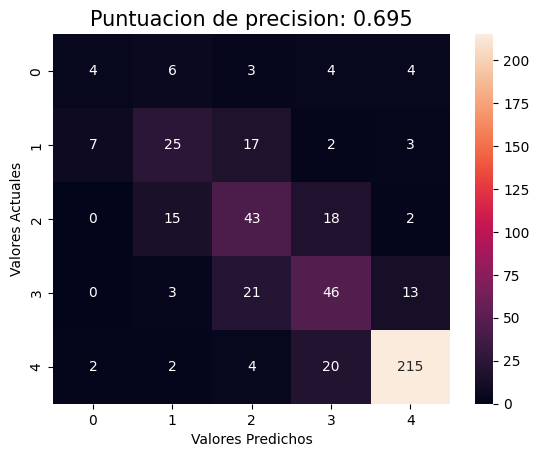

In [350]:
# Define Model
model = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)

# Fit search to new training data
result = model.fit(X_train, y_train)

# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Actuales')
plt.title('Puntuacion de precision: {0}'.format(score), size=15)
plt.show()

Al reducir las caracteristicas para predecir a las 3 mas significativas se obtiene una precision de casi el 70%, que es un poco menor que la obtenida al utiizar la totalidad de las caracteristicas.

Concluyendo de igual forma se pudo demostrar que la caracteristica mas determinante con respecto a la obtención de calificaciones es la inasistencia de los estudiantes y en segundo planto los tiempos de estudio personal de los estudiantes, además se pudp observar que la mayoria de las caracteristicas pertenecientes al dataset no tienen mayor importancia con respecto a las calificaciones obtenidas por los estudiantes.